<a href="https://colab.research.google.com/github/mzeydkurt/mzeydkurt/blob/main/gezegenornek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/gezegen_veri_seti.csv')
df

,Gezegen Adı,Uzaklık (milyon km),Atmosfer Tipi,Su Yüzdesi (%),Yüzey Tipi
0,Gezegen-1,112,İnce,46,Gazlı
1,Gezegen-2,445,Yoğun,61,Buzlu
2,Gezegen-3,358,İnce,50,Buzlu
3,Gezegen-4,280,İnce,54,Kayalık
4,Gezegen-5,116,İnce,63,Buzlu
5,Gezegen-6,81,İnce,2,Buzlu
6,Gezegen-7,198,Yoğun,100,Gazlı
7,Gezegen-8,30,Yoğun,50,Kayalık
8,Gezegen-9,112,İnce,6,Gazlı
9,Gezegen-10,131,İnce,20,Gazlı


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gezegen Adı          20 non-null     object
 1   Uzaklık (milyon km)  20 non-null     int64 
 2   Atmosfer Tipi        20 non-null     object
 3   Su Yüzdesi (%)       20 non-null     int64 
 4   Yüzey Tipi           20 non-null     object
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes


In [4]:
df.describe()

,Uzaklık (milyon km),Su Yüzdesi (%)
count,20.000000,20.000000
mean,231.450000,44.550000
std,144.340415,30.328855
min,30.000000,2.000000
25%,112.000000,16.000000
50%,179.500000,50.000000
75%,360.750000,61.500000
max,476.000000,100.000000


In [8]:
df.columns

Index(['Gezegen Adı', 'Uzaklık (milyon km)', 'Atmosfer Tipi', 'Su Yüzdesi (%)',
       'Yüzey Tipi'],
      dtype='object')

In [5]:
df.isnull()

,Gezegen Adı,Uzaklık (milyon km),Atmosfer Tipi,Su Yüzdesi (%),Yüzey Tipi
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [12]:
df.isnull().sum()

,0
Gezegen Adı,0
Uzaklık (milyon km),0
Atmosfer Tipi,0
Su Yüzdesi (%),0
Yüzey Tipi,0


In [35]:
df.head()

,Gezegen Adı,Uzaklık (milyon km),Atmosfer Tipi,Su Yüzdesi (%),Yüzey Tipi,Küme
0,Gezegen-1,112,İnce,46,Gazlı,0
1,Gezegen-2,445,Yoğun,61,Buzlu,2
2,Gezegen-3,358,İnce,50,Buzlu,2
3,Gezegen-4,280,İnce,54,Kayalık,2
4,Gezegen-5,116,İnce,63,Buzlu,0


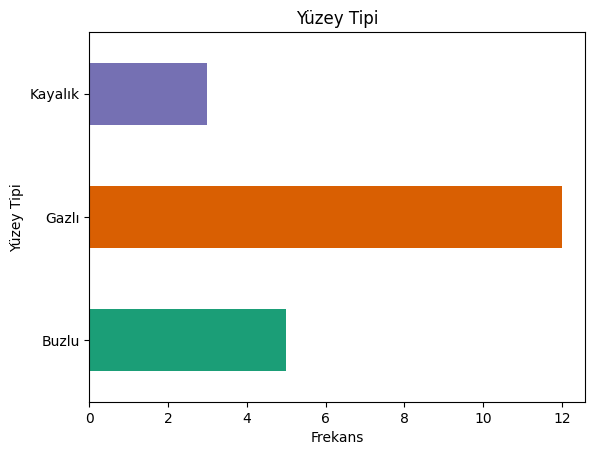

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Yüzey Tipi').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Yüzey Tipi')
plt.xlabel('Frekans')
plt.ylabel('Yüzey Tipi')
plt.show()

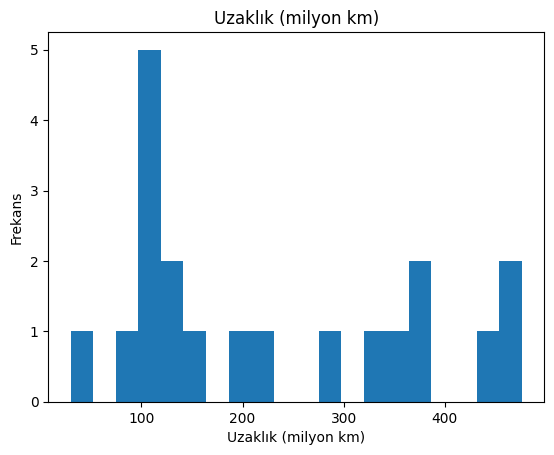

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Uzaklık (milyon km)'].plot(kind='hist', bins=20, title='Uzaklık (milyon km)')
plt.xlabel('Uzaklık (milyon km)')
plt.ylabel('Frekans')
plt.show()

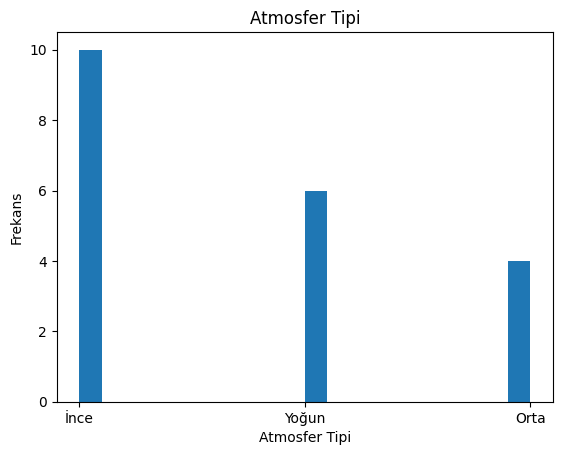

In [19]:
plt.hist(df['Atmosfer Tipi'],bins=20)
plt.title('Atmosfer Tipi')
plt.xlabel('Atmosfer Tipi')
plt.ylabel('Frekans')
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
numerical_data = df[['Uzaklık (milyon km)', 'Su Yüzdesi (%)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Küme'] = kmeans.fit_predict(scaled_data)

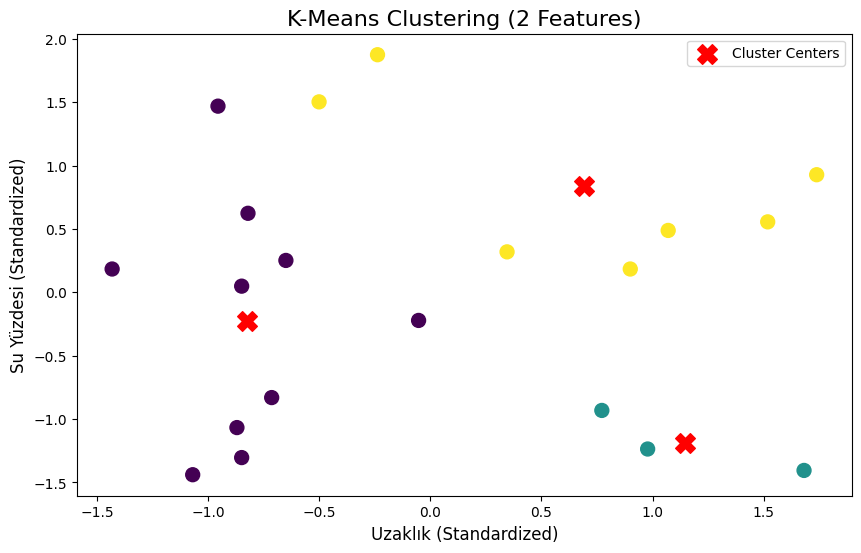

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['Küme'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering (2 Features)', fontsize=16)
plt.xlabel('Uzaklık (Standardized)', fontsize=12)
plt.ylabel('Su Yüzdesi (Standardized)', fontsize=12)
plt.legend()
plt.show()


In [27]:
print(df[['Gezegen Adı', 'Uzaklık (milyon km)', 'Su Yüzdesi (%)', 'Küme']].head())


  Gezegen Adı  Uzaklık (milyon km)  Su Yüzdesi (%)  Küme
0   Gezegen-1                  112              46     0
1   Gezegen-2                  445              61     2
2   Gezegen-3                  358              50     2
3   Gezegen-4                  280              54     2
4   Gezegen-5                  116              63     0
